# Requirement Specification for Product Allocation Algorithm

## Objective

1. To minimize the maximum transportation time across all warehouse-order allocations as represented in the Allocation Matrix.

## Input Parameters

1. **Transport Time Matrix (X)**: A matrix that represents the transport time (per unit) between each warehouse and each order.
2. **Demand Array (Y)**: An array that specifies the demand for each order.
3. **Stock Array (Z)**: An array that details the current stock of the product in each warehouse.

## Output Parameters

1. **Allocation Matrix (A)**: A matrix indicating the volume of the product that will be transported from each warehouse to each order.
2. **Minimized Maximum Transport Time**: The smallest maximum transport time that can be achieved. where transport time is calculated by multiplying the transport time per unit with the volume of the product transported.
## Constraints

1. For each order $i$, $\sum_{j} A_{ij} = Y_i$, where $A_{ij}$ is the volume allocated from warehouse $j$ to order $i$.
2. For each warehouse $j$, $\sum_{i} A_{ij} \leq Z_j$, where $Z_j$ is the inventory in warehouse $j$.
3. For each warehouse $j$ and order $i$, $A_{ij} \geq 0$.



# Detailed Algorithm Plan for Product Allocation

Here is a comprehensive and step-by-step algorithm plan to tackle the problem. This plan aims to be clear, practical, and implemented in a Python Notebook.

#### Pre-processing: Validate Inputs

Before diving into the main algorithm, validate the input data to ensure compatibility and correctness.

```python
# Validate the inputs
is_valid, msg = validate_inputs(X, Y, Z)
if not is_valid:
    raise ValueError(msg)
```

#### Step 1: Problem Formulation and Graph Building

1. **Initialize Graph Data Structures**

    - Initialize an adjacency list to represent the directed graph.
  
    ```python
    from collections import defaultdict
    graph = defaultdict(list)
    ```

2. **Add Nodes and Edges**

    - Create nodes for each warehouse (`W1, W2, ...`) and each order (`O1, O2, ...`). Add a source (`S`) and sink (`T`) node.
    
    - Connect these nodes based on the arrays `X, Y, Z`.
  
    ```python
    def build_graph(X, Y, Z):
        # Your code to build the graph here
        return graph

    graph = build_graph(X, Y, Z)
    ```

####  Step 3: Binary Search with Min-Cost Max-Flow

0. **Calculate Bounds**

    - Calculate the lower and upper bounds for the maximum transport time from the matrix `X`.

    ```python
    lower_bound = np.min(X)
    upper_bound = np.max(X)
    ```



1. **Loop Condition and Initialization**

    ```python
    best_max_time = upper_bound
    while lower_bound <= upper_bound:
    ```

2. **Modify Graph Based on `T`**

    - For each `T` value, modify the graph to either remove or highly penalize edges with a cost greater than `T`.

    ```python
    def modify_graph(graph, X, T):
        # Your code to modify the graph here
        return modified_graph
    ```

3. **Run Min-Cost Max-Flow Algorithm**

    - Implement the Min-Cost Max-Flow algorithm to check if the current `T` allows all orders to be satisfied.

    ```python
    def min_cost_max_flow(graph):
        # Your code for min-cost max-flow here
        return feasible

    feasible = min_cost_max_flow(modified_graph)
    ```

4. **Update Bounds**

    - Update `lower_bound` or `upper_bound` based on whether all orders can be satisfied.
    
    ```python
    if feasible:
        best_max_time = T
        upper_bound = T - 1
    else:
        lower_bound = T + 1
    ```

#### Step 4: Extract and Validate the Optimal Allocation

1. **Run Min-Cost Max-Flow One Final Time**

    - Generate the final graph with the `best_max_time` and get the flows.

    ```python
    final_graph = modify_graph(graph, X, best_max_time)
    min_cost_max_flow(final_graph)
    ```

2. **Extract Allocation Matrix `A`**

    ```python
    def extract_allocations(final_graph):
        # Your code to extract allocations
        return A

    A = extract_allocations(final_graph)
    ```

3. **Validate Results**

    - Ensure that the sum of allocations for each order ≥ demand and for each warehouse ≤ inventory.

    ```python
    def validate(A, Y, Z):
        # Your code to validate the result
        return is_valid, msg

    is_valid, msg = validate(A, Y, Z)
    if not is_valid:
        raise ValueError(msg)
    ```

After implementing each function or segment of code, remember to test it thoroughly in your Python Notebook before proceeding to the next step. This ensures that the algorithm is working as expected at each stage.

Test case 1 (All orders can be satisfied, no priority needed): Inputs are valid
Test case 2 (Not all orders can be satisfied, and priority comes into play): Inputs are valid
Test case 3 (All orders can be satisfied, but not in a greedy manner): Inputs are valid
Test case 4 (Not all orders can be satisfied, and priority comes into play): Inputs are valid
Test case 5 (All orders can be satisfied, no priority needed): Inputs are valid
Test case 6 (Not all orders can be satisfied, but all warehouses can contribute to the high priority order): Inputs are valid
Test case 7 (Complex case): Inputs are valid


# implementation

Understood. Given your feedback, I'll leverage `networkx` to simplify the Min-Cost Max-Flow calculations and take into account the cost per product from `X`.

### Revised Plan:

#### 1. Formulate the Problem and Build the Graph:
- This is as previously described, and we've already implemented part of it.

#### 2. Implement Min-Cost Max-Flow using Networkx:
1. Convert our graph representation to a Networkx graph.
2. Assign capacities and costs to edges based on input arrays and matrices.
3. Utilize Networkx's `min_cost_flow` function.

#### 3. Binary Search on Transportation Time:
1. Set the initial bounds for the binary search from the `X` matrix.
2. For each midpoint in the binary search range:
    a. Modify the graph to account for the transportation time.
    b. Compute the Min-Cost Max-Flow on the modified graph using Networkx.
    c. Update the bounds based on whether all demands were satisfied or not.
3. Return the minimum possible maximum transportation time.

#### 4. Extract Optimal Allocation:
Once the binary search identifies the optimal transportation time:

1. Run the Min-Cost Max-Flow algorithm one final time using Networkx to obtain the flows for this configuration.
2. Extract these flows to populate matrix `A` indicating the allocation from each warehouse to each order.
3. Validate the results using the validation conditions mentioned in the initial problem context.

#### 5. Testing:

1. Test each individual component after its implementation.
2. Conduct comprehensive testing using the provided test data.

#### 6. Feedback and Iteration:
1. If there are any issues, identify their sources, fix them, and then re-test.
2. If results are as expected, validate with additional test scenarios to ensure robustness.

### Pseudocode Plan:

```python
# 2: Min-Cost Max-Flow using Networkx
import networkx as nx

def get_min_cost_flow(graph):
    # Convert the adjacency list to networkx graph
    G = nx.DiGraph()
    # Add nodes and edges, assign capacities and costs
    ...
    # Get the min-cost flow
    flowDict = nx.min_cost_flow(G)
    return flowDict

# 3: Binary Search on Transportation Time
def binary_search_on_time(X, Y, Z):
    # Set initial bounds
    ...
    while lower_bound <= upper_bound:
        mid = ...
        modified_graph = modify_graph_for_time(graph, mid, X)
        flows = get_min_cost_flow(modified_graph)
        # Update bounds based on the results

    return optimal_time

# 4: Extract Optimal Allocation
def extract_allocations(flowDict):
    ...
    return A

# 5: Testing
def test():
    ...
    print("All tests passed!")

test()
```

Given the new plan and the simplifications from using `networkx`, the implementation will be more streamlined. Once you confirm, we can begin the implementation.

## Step 0: data validation & handcraft 

same as demo-LP



In [2]:
import numpy as np

def validate_inputs(X, Y, Z):
    """
    Validates the input parameters for the product allocation problem.
    
    :param X: Transport Time Matrix (2D NumPy array)
    :param Y: Demand Array (1D NumPy array)
    :param Z: Stock Array (1D NumPy array)
    :return: A boolean value indicating the validity of the inputs and a message string.
    """
    # Check if X is a 2D array
    if X.ndim != 2:
        return False, "X must be a 2D array currently"
    
    # Check if Y and Z are 1D arrays
    if Y.ndim != 1 or Z.ndim != 1:
        return False, "Y and Z must be 1D arrays currently"
    
    # Check if the dimensions of X, Y, and Z are compatible
    rows_X, cols_X = X.shape
    if len(Y) != rows_X or len(Z) != cols_X:
        return False, "Dimensions of X, Y, and Z are not compatible"
    
    # Check if all elements are non-negative
    if np.any(X < 0) or np.any(Y < 0) or np.any(Z < 0):
        return False, "All elements in X, Y, and Z must be non-negative"
    
    return True, "Inputs are valid"

# Test data definitions
test_data = [
    {
        'X': np.array([[4, 2], [3, 2]]),
        'Y': np.array([1, 1]),
        'Z': np.array([3, 4]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, no priority needed"
    },
    {
        'X': np.array([[2, 8], [1, 4]]),
        'Y': np.array([10, 5]),
        'Z': np.array([5, 5]),
        'priority_order': np.array([0, 1]),
        'description': "Not all orders can be satisfied, and priority comes into play"
    },
    {
        'X': np.array([[1, 1], [1, 2]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, but not in a greedy manner"
    },
    {
        'X': np.array([[1], [0], [2]]),
        'Y': np.array([1, 1, 2]),
        'Z': np.array([2]),
        'priority_order': np.array([2, 1, 0]),
        'description': "Not all orders can be satisfied, and priority comes into play"
    },
    {
        'X': np.array([[1]]),
        'Y': np.array([1]),
        'Z': np.array([1]),
        'priority_order': np.array([0]),
        'description': "All orders can be satisfied, no priority needed"
    },
    {
        'X': np.array([[1, 1], [0, 0]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1]),
        'priority_order': np.array([1, 0]),
        'description': "Not all orders can be satisfied, but all warehouses can contribute to the high priority order"
    },
    {
        'X': np.array([[1., 4.],
                    [2., 2.],
                    [4., 2.],
                    [2., 1.],
                    [1., 4.]]), 
        'Y': np.array([46., 26.,  6., 27., 17.]),
        'Z': np.array([2., 18.]),
        'priority_order': np.array([3, 4, 1, 0, 2]),
        'description': "Complex case"
    }
]

# Validate the test data
for i, case in enumerate(test_data):
    is_valid, message = validate_inputs(case['X'], case['Y'], case['Z'])
    print(f"Test case {i+1} ({case['description']}): {message}")


Test case 1 (All orders can be satisfied, no priority needed): Inputs are valid
Test case 2 (Not all orders can be satisfied, and priority comes into play): Inputs are valid
Test case 3 (All orders can be satisfied, but not in a greedy manner): Inputs are valid
Test case 4 (Not all orders can be satisfied, and priority comes into play): Inputs are valid
Test case 5 (All orders can be satisfied, no priority needed): Inputs are valid
Test case 6 (Not all orders can be satisfied, but all warehouses can contribute to the high priority order): Inputs are valid
Test case 7 (Complex case): Inputs are valid


## Step 1: Graph Building

Below is explanation using 1-based indexing on first element in test_data, where rows in the matrix \( X \) represent orders and columns represent warehouses.

---

**Test Case Overview:**
1. **Transport Time Matrix (X)**: 
\[ 
X = \begin{bmatrix}
4 & 2 \\
3 & 2 \\
\end{bmatrix}
\]
This matrix represents the transportation time taken from each warehouse (columns) to each order (rows). For example, the element \( X_{1,2} \) (which is 2) represents the time taken to transport a unit of product from Warehouse 2 to Order 1.

2. **Demand Array (Y)**: 
\[ 
Y = \begin{bmatrix}
1 \\
1 \\
\end{bmatrix}
\]
This signifies Order 1 and Order 2 both require 1 unit of the product.

3. **Stock Array (Z)**: 
\[ 
Z = \begin{bmatrix}
3 \\
4 \\
\end{bmatrix}
\]
Warehouse 1 has 3 units of the product in stock, while Warehouse 2 has 4 units.

---

**Graph Representation**:
1. **Source Node ('S') Connections**:
   - Connection to 'W1' has a capacity of \( Z_1 \) (which is 3) and zero cost. This signifies that Warehouse 1 can provide up to 3 units.
   - Connection to 'W2' has a capacity of \( Z_2 \) (which is 4) and zero cost, indicating Warehouse 2 can provide up to 4 units.

2. **Warehouse to Order Connections**:
   - Connection from 'W1' to 'O1' has infinite capacity (no limit on how many items Warehouse 1 can send to Order 1) and a cost of \( X_{1,1} \) (which is 4). The cost denotes the transport time from Warehouse 1 to Order 1.
   - Connection from 'W1' to 'O2' has infinite capacity and a cost of \( X_{2,1} \) (which is 3).
   - Connection from 'W2' to 'O1' has infinite capacity and a cost of \( X_{1,2} \) (which is 2).
   - Connection from 'W2' to 'O2' has infinite capacity and a cost of \( X_{2,2} \) (which is 2).

3. **Order Nodes to Sink Node ('T') Connections**:
   - Connection from 'O1' to 'T' has a capacity of \( Y_1 \) (which is 1) and zero cost.
   - Connection from 'O2' to 'T' has a capacity of \( Y_2 \) (which is 1) and zero cost.

---

**How is the 'Unit Time' represented?**
The unit time is represented by the cost on the edges connecting warehouses to orders. It illustrates the transportation time per unit of product between a specific warehouse and order. 

For example:
- Transporting one unit of product from Warehouse 1 to Order 1 takes 4 units of time, denoted by the edge ('W1', 'O1') having a cost of \( X_{1,1} \).

**What is the flow?**
In a flow network, the flow signifies the quantity or volume of items moving along the edges. For this scenario, the flow would portray how many units of the product are transported from each warehouse to each order. 

For instance, when the min-cost flow problem for this graph is resolved:
- If the flow from 'W1' to 'O1' is 1, it means one unit of product is dispatched from Warehouse 1 to Order 1.

In [3]:
from collections import defaultdict
import numpy as np

def build_graph(X, Y, Z):
    print(f"Shapes: X={X.shape}, Y={Y.shape}, Z={Z.shape}")  # Debugging line
    
    local_graph = defaultdict(list)
    source, sink = 'S', 'T'
    
    num_warehouses = Z.shape[0]  # This should align with Z
    num_orders = Y.shape[0]  # This should align with Y

    # Connect source to warehouses with weight 0
    for w in range(num_warehouses):
        warehouse_node = f'W{w}'
        local_graph[source].append((warehouse_node, Z[w], 0))

    # Connect orders to sink with weight 0
    for o in range(num_orders):
        order_node = f'O{o}'
        local_graph[order_node].append((sink, Y[o], 0))

    # Connect warehouses to orders with the corresponding weight from matrix X
    for w in range(num_warehouses):
        for o in range(num_orders):
            warehouse_node, order_node = f'W{w}', f'O{o}'
            local_graph[warehouse_node].append((order_node, float('inf'), X[o, w]))  # Use infinity for capacity
    
    return local_graph



Test case 1: All orders can be satisfied, no priority needed
Shapes: X=(2, 2), Y=(2,), Z=(2,)
S: [('W0', 3, 0), ('W1', 4, 0)]
O0: [('T', 1, 0)]
O1: [('T', 1, 0)]
W0: [('O0', inf, 4), ('O1', inf, 3)]
W1: [('O0', inf, 2), ('O1', inf, 2)]


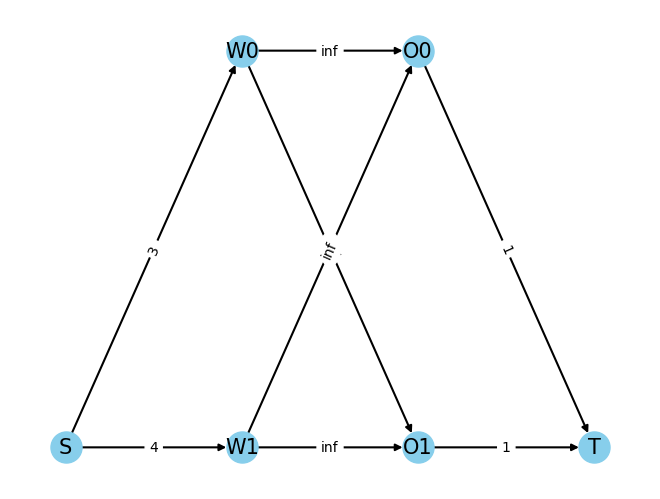

Matrix X (Transport Time):
[[4 2]
 [3 2]]

Vector Y (Demand):
[1 1]

Vector Z (Stock):
[3 4]
--------------------------------------------------
Test case 2: Not all orders can be satisfied, and priority comes into play
Shapes: X=(2, 2), Y=(2,), Z=(2,)
S: [('W0', 5, 0), ('W1', 5, 0)]
O0: [('T', 10, 0)]
O1: [('T', 5, 0)]
W0: [('O0', inf, 2), ('O1', inf, 1)]
W1: [('O0', inf, 8), ('O1', inf, 4)]


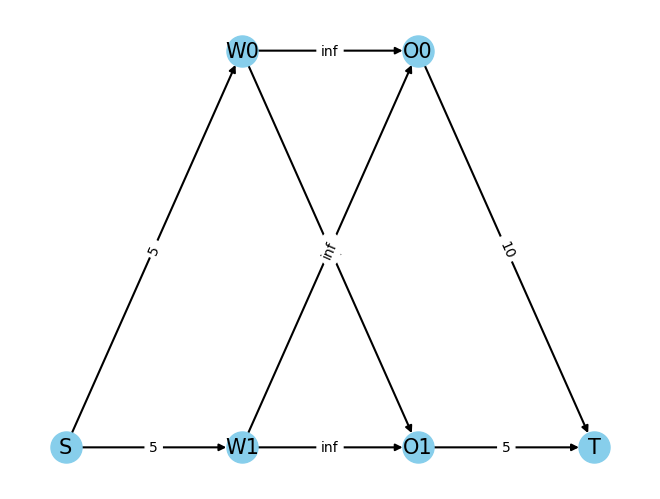

Matrix X (Transport Time):
[[2 8]
 [1 4]]

Vector Y (Demand):
[10  5]

Vector Z (Stock):
[5 5]
--------------------------------------------------
Test case 3: All orders can be satisfied, but not in a greedy manner
Shapes: X=(2, 2), Y=(2,), Z=(2,)
S: [('W0', 1, 0), ('W1', 1, 0)]
O0: [('T', 1, 0)]
O1: [('T', 1, 0)]
W0: [('O0', inf, 1), ('O1', inf, 1)]
W1: [('O0', inf, 1), ('O1', inf, 2)]


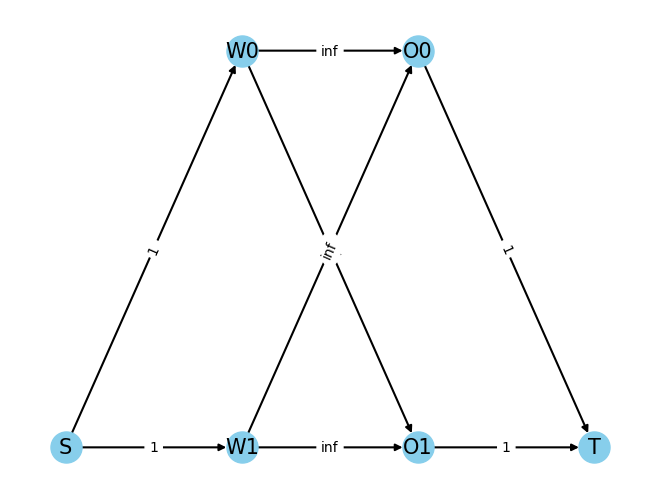

Matrix X (Transport Time):
[[1 1]
 [1 2]]

Vector Y (Demand):
[1 1]

Vector Z (Stock):
[1 1]
--------------------------------------------------
Test case 4: Not all orders can be satisfied, and priority comes into play
Shapes: X=(3, 1), Y=(3,), Z=(1,)
S: [('W0', 2, 0)]
O0: [('T', 1, 0)]
O1: [('T', 1, 0)]
O2: [('T', 2, 0)]
W0: [('O0', inf, 1), ('O1', inf, 0), ('O2', inf, 2)]


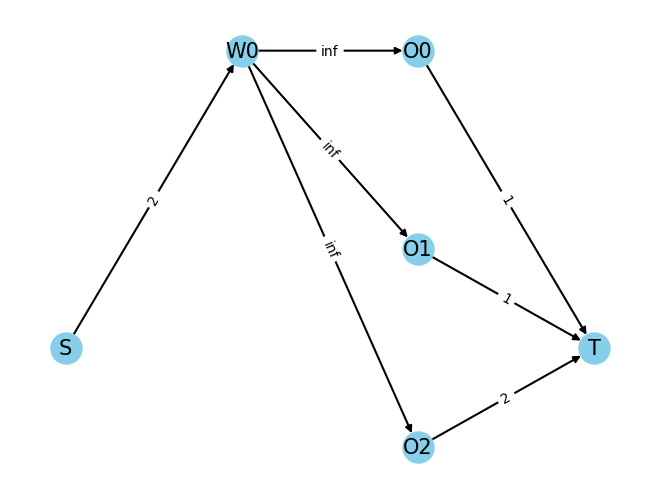

Matrix X (Transport Time):
[[1]
 [0]
 [2]]

Vector Y (Demand):
[1 1 2]

Vector Z (Stock):
[2]
--------------------------------------------------
Test case 5: All orders can be satisfied, no priority needed
Shapes: X=(1, 1), Y=(1,), Z=(1,)
S: [('W0', 1, 0)]
O0: [('T', 1, 0)]
W0: [('O0', inf, 1)]


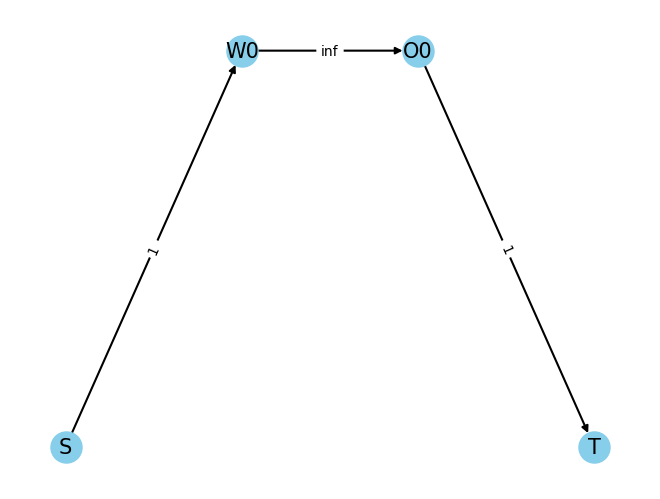

Matrix X (Transport Time):
[[1]]

Vector Y (Demand):
[1]

Vector Z (Stock):
[1]
--------------------------------------------------
Test case 6: Not all orders can be satisfied, but all warehouses can contribute to the high priority order
Shapes: X=(2, 2), Y=(2,), Z=(2,)
S: [('W0', 1, 0), ('W1', 1, 0)]
O0: [('T', 1, 0)]
O1: [('T', 1, 0)]
W0: [('O0', inf, 1), ('O1', inf, 0)]
W1: [('O0', inf, 1), ('O1', inf, 0)]


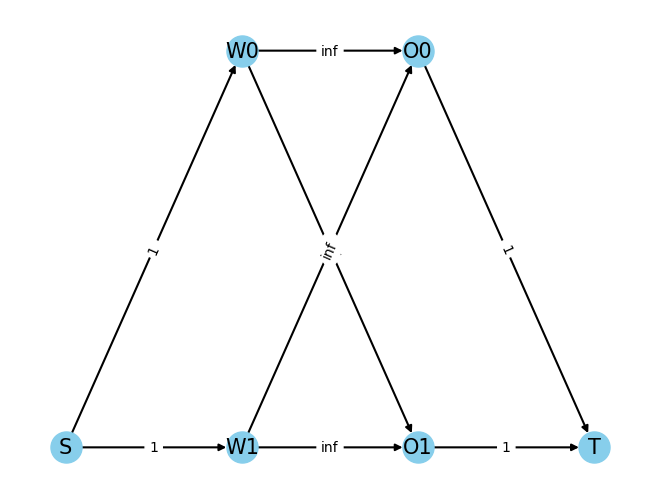

Matrix X (Transport Time):
[[1 1]
 [0 0]]

Vector Y (Demand):
[1 1]

Vector Z (Stock):
[1 1]
--------------------------------------------------
Test case 7: Complex case
Shapes: X=(5, 2), Y=(5,), Z=(2,)
S: [('W0', 2.0, 0), ('W1', 18.0, 0)]
O0: [('T', 46.0, 0)]
O1: [('T', 26.0, 0)]
O2: [('T', 6.0, 0)]
O3: [('T', 27.0, 0)]
O4: [('T', 17.0, 0)]
W0: [('O0', inf, 1.0), ('O1', inf, 2.0), ('O2', inf, 4.0), ('O3', inf, 2.0), ('O4', inf, 1.0)]
W1: [('O0', inf, 4.0), ('O1', inf, 2.0), ('O2', inf, 2.0), ('O3', inf, 1.0), ('O4', inf, 4.0)]


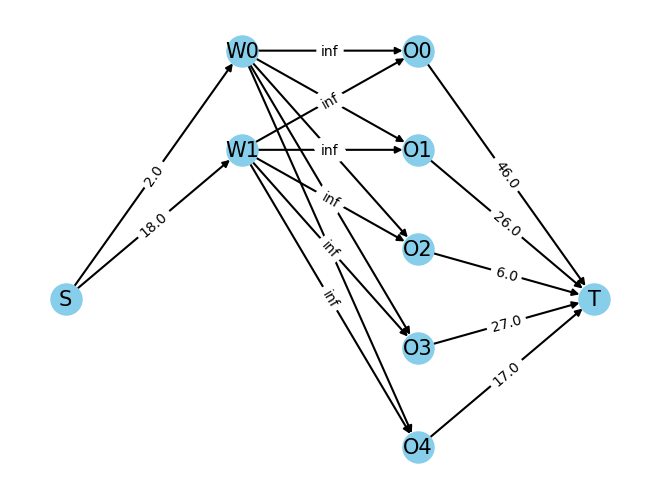

Matrix X (Transport Time):
[[1. 4.]
 [2. 2.]
 [4. 2.]
 [2. 1.]
 [1. 4.]]

Vector Y (Demand):
[46. 26.  6. 27. 17.]

Vector Z (Stock):
[ 2. 18.]
--------------------------------------------------


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph_with_data(graph, X, Y, Z):
    """
    Visualizes a given bipartite graph with associated matrices using networkx and matplotlib.
    
    :param graph: The graph to visualize
    :param X: Transport Time Matrix
    :param Y: Demand Array
    :param Z: Stock Array
    """
    G = nx.DiGraph()
    
    # Add nodes and edges to the graph
    for node, edges in graph.items():
        for neighbor, capacity, cost in edges:  # Corrected unpacking to handle the three-tuple
            G.add_edge(node, neighbor, capacity=capacity, weight=cost)  # Use 'cost' to denote the weight

    # Manually define positions for nodes
    pos = {}
    num_warehouses = Z.shape[0]
    num_orders = Y.shape[0]
    
    max_vertical = max(num_warehouses, num_orders)
    mid_vertical = max_vertical / 2

    pos['S'] = (0, mid_vertical)
    for w in range(num_warehouses):
        pos[f"W{w}"] = (1, max_vertical - w)  # Vertically list warehouses next to 'S'
    for o in range(num_orders):
        pos[f"O{o}"] = (2, max_vertical - o)  # Vertically list orders next to 'Ws'
    pos['T'] = (3, mid_vertical)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, width=1.5)
    labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

    # Print matrices as text
    print("Matrix X (Transport Time):")
    print(X)
    print("\nVector Y (Demand):")
    print(Y)
    print("\nVector Z (Stock):")
    print(Z)

# With this function, you can now visualize your graph correctly.


# Iterate through test data to validate, build, and visualize each graph
for i, test_case in enumerate(test_data):
    print(f"Test case {i + 1}: {test_case['description']}")
    
    X, Y, Z = test_case['X'], test_case['Y'], test_case['Z']
    
    # Validate inputs first
    is_valid, message = validate_inputs(X, Y, Z)
    if not is_valid:
        print(f"Validation failed: {message}")
        print('-' * 50)
        continue
    
    # Build graph and print it if validation succeeded
    graph = build_graph(X, Y, Z)
    for node, edges in graph.items():
        print(f'{node}: {edges}')
    
    # Visualize the graph and matrices
    visualize_graph_with_data(graph, X, Y, Z)
        
    print('-' * 50)


## Step 2: Min-Cost Max-Flow



Okay, I'll implement the step for Min-Cost Max-Flow using Networkx. For this step:

1. We'll first convert the existing graph structure to a Networkx graph.
2. Then, we'll assign capacities and costs to the edges as per our problem.
3. Finally, we'll test the function using `min_cost_flow` from Networkx.

Let's implement this:


Run the code in your notebook to check the results. The `flows` dictionary should provide the allocation from each warehouse to each order. This will validate if our Min-Cost Max-Flow function is working as expected.

In [6]:
import numpy as np
import networkx as nx
from collections import defaultdict


# Adjust the graph for the current maximum time
def build_graph_with_max_time(X, Y, Z, max_time):
    print(f"Maximum time for this iteration: {max_time}")
    
    local_graph = build_graph(X, Y, Z)
    print("Initial Graph: ", local_graph)
    
    for w in range(X.shape[1]):
        for o in range(X.shape[0]):
            warehouse_node, order_node = f'W{w}', f'O{o}'
            if X[o, w] > max_time:
                new_edges = []
                for neighbor, capacity, weight in local_graph[warehouse_node]:
                    if neighbor != order_node:
                        new_edges.append((neighbor, capacity, weight))
                local_graph[warehouse_node] = new_edges
    print("Adjusted Graph: ", local_graph)
    
    return local_graph

# Function to convert our graph dictionary into a networkx graph
def build_nx_graph(local_graph):
    G = nx.DiGraph()
    for node, neighbors in local_graph.items():
        for neighbor, capacity, weight in neighbors:
            G.add_edge(node, neighbor, capacity=capacity, weight=weight)
    
    print("Nodes in Graph: ", G.nodes(data=True))
    print("Edges in Graph: ", G.edges(data=True))
    
    return G

# Main function for minimizing the maximum time
def minimize_maximum_time(X, Y, Z):
    low = 0
    high = np.max(X)
    optimal_time = None
    optimal_flow = None

    while low <= high:
        mid = (low + high) // 2
        print(f"Checking max_time = {mid}")
        
        adjusted_graph = build_graph_with_max_time(X, Y, Z, mid)
        G = build_nx_graph(adjusted_graph)
        
        try:
            flow_dict = nx.min_cost_flow(G)
            print("Flow Dictionary: ", flow_dict)
        except nx.NetworkXError as e:
            print(f"NetworkX Error for max_time = {mid}: {e}")
            high = mid - 1
            continue
        
        all_orders_satisfied = all(
            sum(flow_dict[f'W{w}'].get(f'O{o}', 0) for w in range(Z.shape[0])) >= Y[o]
            for o in range(Y.shape[0])
        )
        
        if all_orders_satisfied:
            optimal_time = mid
            optimal_flow = flow_dict
            high = mid - 1
        else:
            low = mid + 1

    print(f"Optimal maximum time: {optimal_time}")
    print(f"Optimal flow (allocation strategy): {optimal_flow}")

    return optimal_time

# Assuming test_data is defined somewhere in your code
test_case = {
    'X': np.array([[4, 2], [3, 2]]),
    'Y': np.array([1, 1]),
    'Z': np.array([3, 4])
}

for test_case in test_data:
    X, Y, Z = test_case['X'], test_case['Y'], test_case['Z']
    result = minimize_maximum_time(X, Y, Z)
    print("Optimal maximum time:", result)
    print("--------------------------")


Checking max_time = 2
Maximum time for this iteration: 2
Shapes: X=(2, 2), Y=(2,), Z=(2,)
Initial Graph:  defaultdict(<class 'list'>, {'S': [('W0', 3, 0), ('W1', 4, 0)], 'O0': [('T', 1, 0)], 'O1': [('T', 1, 0)], 'W0': [('O0', inf, 4), ('O1', inf, 3)], 'W1': [('O0', inf, 2), ('O1', inf, 2)]})
Adjusted Graph:  defaultdict(<class 'list'>, {'S': [('W0', 3, 0), ('W1', 4, 0)], 'O0': [('T', 1, 0)], 'O1': [('T', 1, 0)], 'W0': [], 'W1': [('O0', inf, 2), ('O1', inf, 2)]})
Nodes in Graph:  [('S', {}), ('W0', {}), ('W1', {}), ('O0', {}), ('T', {}), ('O1', {})]
Edges in Graph:  [('S', 'W0', {'capacity': 3, 'weight': 0}), ('S', 'W1', {'capacity': 4, 'weight': 0}), ('W1', 'O0', {'capacity': inf, 'weight': 2}), ('W1', 'O1', {'capacity': inf, 'weight': 2}), ('O0', 'T', {'capacity': 1, 'weight': 0}), ('O1', 'T', {'capacity': 1, 'weight': 0})]
Flow Dictionary:  {'S': {'W0': 0, 'W1': 0}, 'W0': {}, 'W1': {'O0': 0, 'O1': 0}, 'O0': {'T': 0}, 'T': {}, 'O1': {'T': 0}}
Checking max_time = 3
Maximum time for thi

In [41]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add the edges (u, v, capacity, weight)
edges = [
    ('S', 'W0', 10, 0), ('S', 'W1', 10, 0),  # Edges from source to warehouses
    ('W0', 'O0', 5, 1), ('W0', 'O1', 5, 5),  # Edges from W0 to orders
    ('W1', 'O0', 5, 5), ('W1', 'O1', 5, 1),  # Edges from W1 to orders
    ('O0', 'T', 5, 0), ('O1', 'T', 5, 0)     # Edges from orders to sink
]

# Add edges to graph
for u, v, capacity, weight in edges:
    G.add_edge(u, v, capacity=capacity, weight=weight)

# Add demand to nodes
G.nodes['S']['demand'] = -10
G.nodes['T']['demand'] = 10

# Solve the min-cost flow problem
flow_dict = nx.min_cost_flow(G, demand='demand', capacity='capacity', weight='weight')

# Print the result
print("Flow Dictionary:")
for node, flows in flow_dict.items():
    print(f"{node}: {flows}")


Flow Dictionary:
S: {'W0': 5, 'W1': 5}
W0: {'O0': 5, 'O1': 0}
W1: {'O0': 0, 'O1': 5}
O0: {'T': 5}
O1: {'T': 5}
T: {}


In [9]:
from collections import defaultdict
import numpy as np

# Validate inputs
def validate_inputs(X, Y, Z):
    if X.ndim != 2 or Y.ndim != 1 or Z.ndim != 1:
        return False, "Invalid dimensions."
    if X.shape[0] != len(Y) or X.shape[1] != len(Z):
        return False, "Incompatible shapes."
    if np.any(X < 0) or np.any(Y < 0) or np.any(Z < 0):
        return False, "Negative values are not allowed."
    return True, "Inputs are valid"

# Build initial graph based on inputs X, Y, Z
def build_graph(X, Y, Z):
    graph = defaultdict(list)
    # Your code here
    return graph

# Modify graph based on current maximum allowed transport time T
def modify_graph(graph, X, T):
    modified_graph = defaultdict(list)
    # Your code here
    return modified_graph

# Implement Min-Cost Max-Flow algorithm
def min_cost_max_flow(graph):
    # Your code here
    return True  # Return True if feasible, otherwise return False



# Main function for binary search with Min-Cost Max-Flow
def binary_search_with_flow(X, Y, Z):
    # Initialize bounds and best_max_time
    lower_bound = np.min(X)
    upper_bound = np.max(X)
    best_max_time = upper_bound
    
    # Run binary search
    while lower_bound <= upper_bound:
        T = (lower_bound + upper_bound) // 2
        original_graph = build_graph(X, Y, Z)
        modified_graph = modify_graph(original_graph, X, T)
        
        feasible = min_cost_max_flow(modified_graph)
        
        if feasible:
            best_max_time = T
            upper_bound = T - 1
        else:
            lower_bound = T + 1
            
    return best_max_time

# Running the test cases
for i, test_case in enumerate(test_data):
    valid, message = validate_inputs(test_case['X'], test_case['Y'], test_case['Z'])
    if not valid:
        print(f"Skipping Test case {i+1} due to invalid inputs: {message}")
        continue
    
    print(f"Test case {i + 1}: {test_case['description']}")
    best_max_time = binary_search_with_flow(test_case['X'], test_case['Y'], test_case['Z'])
    print(f"Best maximum transport time for Test case {i + 1}: {best_max_time}")
    print('-' * 50)


Test case 1: All orders can be satisfied, no priority needed
Best maximum transport time for Test case 1: 2
--------------------------------------------------
Test case 2: Not all orders can be satisfied, and priority comes into play
Best maximum transport time for Test case 2: 1
--------------------------------------------------
Test case 3: All orders can be satisfied, but not in a greedy manner
Best maximum transport time for Test case 3: 1
--------------------------------------------------
Test case 4: Not all orders can be satisfied, and priority comes into play
Best maximum transport time for Test case 4: 0
--------------------------------------------------
Test case 5: All orders can be satisfied, no priority needed
Best maximum transport time for Test case 5: 1
--------------------------------------------------
Test case 6: Not all orders can be satisfied, but all warehouses can contribute to the high priority order
Best maximum transport time for Test case 6: 0
---------------

### Step 4: Optimize for Minimum Maximum Transport Time
- Use an optimization algorithm (such as Linear Programming, bi-paritite graph matching, networkflow or other non-heuristic optimization techniques) to adjust the initial allocation in \(A\). The objective is to minimize the maximum transportation time, which is calculated by the Hadamard product of \(A\) and \(X\).
- Note that greedy is not capable in some case like:

In [16]:
import pulp
import numpy as np

def optimize_allocation(data):
    X = data['X']
    Y = data['Y']
    Z = data['Z']
    priority_order = data['priority_order']
    
    num_orders, num_warehouses = X.shape

    # Initialize the ILP problem
    prob = pulp.LpProblem("Product_Allocation", pulp.LpMinimize)

    # Decision Variables (integer type specified)
    A_vars = pulp.LpVariable.dicts("Allocation", [(i, j) for i in range(num_orders) for j in range(num_warehouses)],
                                   0, cat='Integer')  # non-negative integers
    M = pulp.LpVariable("Max_Transport_Time", 0)  # non-negative

    # Objective Function
    prob += M, "Objective is to Minimize the Maximum Transport Time"

    # Constraints
    # Set M to be greater than every element in the Hadamard product of X and A
    for i in range(num_orders):
        for j in range(num_warehouses):
            prob += M >= X[i][j] * A_vars[(i, j)]

    # Adjusted Constraint: Ensure sum of allocations for each order is exactly the demand
    for i in range(num_orders):
        prob += pulp.lpSum([A_vars[(i, j)] for j in range(num_warehouses)]) == Y[i]
        
    # Ensure sum of allocations for each warehouse is <= inventory
    for j in range(num_warehouses):
        prob += pulp.lpSum([A_vars[(i, j)] for i in range(num_orders)]) <= Z[j]

    # Solve
    prob.solve()


    # Extract values of A_vars into a matrix form
    A = np.zeros((num_orders, num_warehouses))
    for i, j in A_vars:
        A[i, j] = A_vars[(i, j)].varValue

    return A



for i, case in enumerate(test_data):
    print(f"============= Test Case {i+1} =============")
    print(f"Description: {case['description']}")
    print(f"Priority Order: {case['priority_order']}")
    print(f"Transport Time Matrix (X): \n{case['X']}")
    print(f"Demand Array (Y): {case['Y']}")
    print(f"Stock Array (Z): {case['Z']}")
    
    is_valid, message = validate_inputs(case['X'], case['Y'], case['Z'])
    if is_valid:
        A, remaining_Z, remaining_Y = initial_allocation(case)
        print("\nInitial Allocation Matrix A:")
        print(A)
        
        # Optimize Allocation
        A_optimized = optimize_allocation(case)
        print("\nOptimized Allocation Matrix A:")
        print(A_optimized)
        
    else:
        print(f"\nInvalid inputs: {message}")
    print("===========================================\n")


============= Test Case 1 =============
Description: All orders can be satisfied, no priority needed
Priority Order: [0 1]
Transport Time Matrix (X): 
[[4 2]
 [3 2]]
Demand Array (Y): [1 1]
Stock Array (Z): [3 4]

Initial Allocation Matrix A:
[[0 1]
 [0 1]]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/f1dcd8cb45864fe2be1fec823c4596a7-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/f1dcd8cb45864fe2be1fec823c4596a7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 53 ENDATA
Problem MODEL has 8 rows, 5 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.33333 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I 

- add consideration for priority: :
    1. ignore priority when all order can be satisfied, find the global optimal solution in this case.
    2. allocate entirely according toorder priority when some of order are unstisfiable, (ignore optimal solution, provide as many as possible inventory for higher priority order)
-  here is  test cases u failed to pass, note they all has sth to do with priority. specificaly
```log

============= Test Case 2 =============
Description: Not all orders can be satisfied, and priority comes into play
Priority Order: [0 1]
Transport Time Matrix (X): 
[[2 8]
 [1 4]]
Demand Array (Y): [10  5]
Stock Array (Z): [5 5]

Initial Allocation Matrix A:
[[0 5]
 [5 0]]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/3d2af2258757456c9ee339fef8a88cbe-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/3d2af2258757456c9ee339fef8a88cbe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 53 ENDATA
Problem MODEL has 8 rows, 5 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00


Optimized Allocation Matrix A:
[[ 8.  2.]
 [-3.  8.]]

 # the ouput is wrong, the expected answer should be [[5 5]] since the  order 2 has highest priority and the inventory is insufficient
===========================================

============= Test Case 4 =============
Description: Not all orders can be satisfied, and priority comes into play
Priority Order: [2 1 0]
Transport Time Matrix (X): 
[[1]
 [0]
 [2]]
Demand Array (Y): [1 1 2]
Stock Array (Z): [2]

Initial Allocation Matrix A:
[[1]
 [1]
 [0]]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/2a685c8073cf448fb310dd81bd61a2e3-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/2a685c8073cf448fb310dd81bd61a2e3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 31 RHS
At line 39 BOUNDS
At line 43 ENDATA
Problem MODEL has 7 rows, 4 columns and 11 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00


Optimized Allocation Matrix A:
[[1.]
 [1.]
 [2.]]

 # the ouput is wrong, the expected answer should be [[0]
 [0]
 [2]] since the  order 2 has highest priority and the inventory is insufficient



```


In [17]:
def allocate_based_on_priority(Y, Z, priority_order):
    A = np.zeros((len(Y), len(Z)))
    for order_index in priority_order:
        for warehouse_index in range(len(Z)):
            allocation = min(Z[warehouse_index], Y[order_index])
            A[order_index][warehouse_index] = allocation
            Z[warehouse_index] -= allocation
            Y[order_index] -= allocation
    return A

def optimize_allocation_priority(data):
    X = data['X']
    Y = data['Y'].copy()  # We make a copy since we modify it
    Z = data['Z'].copy()  # We make a copy since we modify it
    priority_order = data['priority_order']
    
    A, remaining_Z, remaining_Y = initial_allocation(data)
    
    if np.sum(remaining_Y) > 0:  # Not all orders can be satisfied
        A = allocate_based_on_priority(Y, Z, priority_order)
    else:  # All orders can be satisfied
        A = optimize_allocation(data)
    
    return A


for i, case in enumerate(test_data):
    print(f"============= Test Case {i+1} =============")
    print(f"Description: {case['description']}")
    print(f"Priority Order: {case['priority_order']}")
    print(f"Transport Time Matrix (X): \n{case['X']}")
    print(f"Demand Array (Y): {case['Y']}")
    print(f"Stock Array (Z): {case['Z']}")
    
    is_valid, message = validate_inputs(case['X'], case['Y'], case['Z'])
    if is_valid:
        A, remaining_Z, remaining_Y = initial_allocation(case)
        print("\nInitial Allocation Matrix A:")
        print(A)
        
        # Optimize Allocation
        A_optimized = optimize_allocation_priority(case)
        print("\nOptimized Allocation Matrix A:")
        print(A_optimized)
        
    else:
        print(f"\nInvalid inputs: {message}")
    print("===========================================\n")

============= Test Case 1 =============
Description: All orders can be satisfied, no priority needed
Priority Order: [0 1]
Transport Time Matrix (X): 
[[4 2]
 [3 2]]
Demand Array (Y): [1 1]
Stock Array (Z): [3 4]

Initial Allocation Matrix A:
[[0 1]
 [0 1]]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/937cc904166f4651932af32528500ade-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/937cc904166f4651932af32528500ade-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 53 ENDATA
Problem MODEL has 8 rows, 5 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.33333 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I 

### Step 5: Validate Final Allocation
- Ensure that the final allocation \(A\) satisfies all constraints:
  1. Sum of allocations for each order \(i\) should be equal to \(Y_i\).
  2. Sum of allocations for each warehouse \(j\) should not exceed \(Z_j\).
  3. All elements in \(A\) should be greater than or equal to 0.

In [18]:
def validate_allocation_priority(A, Y, Z, priority_order, expected_A=None):
    # Validate if sum of allocations for each order i is equal to Yi
    for i, y in enumerate(Y):
        if np.sum(A[:, i]) != y:
            if np.sum(A) == np.sum(Z):  # All inventory is used
                return False, f"Order {i} allocation mismatch considering priority. Expected: {y}, Got: {np.sum(A[:, i])}. But all inventory was used."
            else:
                return False, f"Order {i} allocation mismatch considering priority. Expected: {y}, Got: {np.sum(A[:, i])}."
    
    # Validate if sum of allocations from each warehouse j does not exceed Zj
    for j, z in enumerate(Z):
        if np.sum(A[j, :]) > z:
            return False, f"Warehouse {j} over allocation. Expected: <= {z}, Got: {np.sum(A[j, :])}."
    
    # Validate if all elements in A are greater than or equal to 0
    if np.any(A < 0):
        return False, "Negative allocation detected."
    
    # If expected_A is provided, compare with the given A
    if expected_A is not None:
        if not np.array_equal(A, expected_A):
            return False, "The given allocation matrix does not match the expected result."

    return True, "All constraints satisfied."


for i, case in enumerate(test_data):
    print(f"============= Test Case {i+1} =============")
    print(f"Description: {case['description']}")
    print(f"Priority Order: {case['priority_order']}")
    print(f"Transport Time Matrix (X): \n{case['X']}")
    print(f"Demand Array (Y): {case['Y']}")
    print(f"Stock Array (Z): {case['Z']}")
    
    A_optimized = optimize_allocation_priority(case)
    print("\nOptimized Allocation Matrix A:")
    print(A_optimized)
    
    # Corrected the fetching of 'Y', 'Z', and 'priority_order' from the current 'case'
    is_valid, message = validate_allocation_priority(A_optimized, case['Y'], case['Z'], case['priority_order'])
    print(message)  # this will print if the allocation was valid or not
    
    print("===========================================\n")


============= Test Case 1 =============
Description: All orders can be satisfied, no priority needed
Priority Order: [0 1]
Transport Time Matrix (X): 
[[4 2]
 [3 2]]
Demand Array (Y): [1 1]
Stock Array (Z): [3 4]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/2c1765c397d84850a22bd9ba89905b9c-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/2c1765c397d84850a22bd9ba89905b9c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 53 ENDATA
Problem MODEL has 8 rows, 5 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.33333 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I processed model has 0 rows, 0 columns (0 inte


### Step 6: Calculate Minimized Maximum Transport Time
- Calculate the minimized maximum transport time as per the final \(A\) and \(X\).

### Step 7: Output
- Return the Allocation Matrix \(A\) and the minimized maximum transport time as the outputs.

In [ ]:
import numpy as np

def compute_minimized_max_transport_time(A, X):
    """
    Compute the minimized maximum transport time based on allocation matrix A and transport time matrix X.
    
    Args:
    - A (numpy.ndarray): Allocation matrix.
    - X (numpy.ndarray): Transport time matrix.
    
    Returns:
    - float: Minimized maximum transport time.
    """
    # Compute the Hadamard product
    hadamard_product = np.multiply(A, X)
    
    # Find and return the maximum value in the matrix
    return np.max(hadamard_product)

def main_allocation_function(case):
    """
    Optimize the product allocation and compute minimized maximum transport time.
    
    Args:
    - case (dict): Dictionary containing priority order, transport time matrix X, demand array Y, and stock array Z.
    
    Returns:
    - dict: Dictionary containing optimized allocation matrix A and minimized maximum transport time.
    """
    
    # Optimize allocation considering priority
    A_optimized = optimize_allocation_priority(case)
    
    # Compute minimized maximum transport time
    max_time = compute_minimized_max_transport_time(A_optimized, case['X'])
    
    return {
        'Allocation Matrix': A_optimized,
        'Minimized Maximum Transport Time': max_time
    }

results = []
for i, case in enumerate(test_data):
    print(f"============= Test Case {i+1} =============")
    print(f"Description: {case['description']}")
    print(f"Priority Order: {case['priority_order']}")
    print(f"Transport Time Matrix (X): \n{case['X']}")
    print(f"Demand Array (Y): {case['Y']}")
    print(f"Stock Array (Z): {case['Z']}")
    
    # Get the results from the main function
    result = main_allocation_function(case)
    
    print("\nOptimized Allocation Matrix A:")
    print(result['Allocation Matrix'])
    
    is_valid, message = validate_allocation_priority(result['Allocation Matrix'], case['Y'], case['Z'], case['priority_order'])
    print(message)  # this will print if the allocation was valid or not

    print(f"Minimized Maximum Transport Time: {result['Minimized Maximum Transport Time']}")

    print("===========================================\n")
    
    results.append(result)



============= Test Case 1 =============
Description: All orders can be satisfied, no priority needed
Priority Order: [0 1]
Transport Time Matrix (X): 
[[4 2]
 [3 2]]
Demand Array (Y): [1 1]
Stock Array (Z): [3 4]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/4605a3ff50f84ad2b176c0557b457613-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/4605a3ff50f84ad2b176c0557b457613-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 53 ENDATA
Problem MODEL has 8 rows, 5 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.33333 - 0.00 seconds
Cgl0004I processed model has 8 rows, 5 columns (4 integer (0 of which binary)) and 16 elements
Cutoff increment increased from 1e



## Next Steps:

```markdown
### Step 8: Test Current Algorithm
1. Test with various data, particularly edge cases.
2. Cases where all orders can't be satisfied.
3. Cases where there's exact stock to meet demands.
4. Situations with highly varied transportation times.

### Step 9: Alternative Algorithms
1. **Bipartite Graph Matching**: This can be seen as a variant of the assignment problem, where you're trying to assign warehouses to orders such that the cost (or time, in this context) is minimized.
    - Implement using the Hungarian method or augmenting path algorithms.
2. **Network Flow**: Model it as a min-cost max-flow problem. Each order and warehouse can be seen as nodes, with capacities and costs.
3. **Non-Heuristic Optimization**: Explore solutions using optimization libraries like `scipy.optimize` or tools like Google's OR-tools.

### Step 10: LP Data Generation for Testing
1. Create a function to generate random scenarios that adhere to the problem's constraints.
2. Make sure to include variations like:
    - Varying the number of orders and warehouses.
    - Introducing outliers in transportation times to test robustness.
    - Having excess demand or stock.

### Step 11: Comparative Analysis
1. Compare the results of the various algorithms on the same test dataset.
2. Analyze:
    - Average minimized maximum transport time.
    - Computation time.
    - Scalability with increasing orders or warehouses.
3. This will give insights into the strengths and weaknesses of each approach, helping you choose the most suitable one.

### Step 12: Documentation
1. Document the assumptions made for each approach.
2. Discuss the pros and cons of each method and provide guidelines on when to use which.

### Step 13: Optimization
1. Based on test results, try to further optimize the best-performing algorithms.
2. Explore parallel processing or other optimization techniques to reduce computation time.

### Step 14: Final Testing & Validation
1. Validate the final chosen solution on a broader test dataset.
2. Ensure that all constraints are always met.

### Step 15: Deployment
1. If you're planning to integrate this solution into a larger system or tool, work on deployment.
2. Ensure integration with other parts of your system, like databases or frontend interfaces, if applicable.

Remember, while testing different algorithms, always use the same set of test data. This ensures a fair comparison between them.

```

## improvement
### Step 8: Test Current Algorithm
1. Test with various data, particularly edge cases.
2. Cases where all orders can't be satisfied.
3. Cases where there's exact stock to meet demands.
4. Situations with highly varied transportation times.

In [ ]:
small_test_data = [
    {
        'description': 'Basic case',
        'priority_order': np.array([0, 1]),
        'X': np.array([
            [1, 3],
            [2, 1]
        ]),
        'Y': np.array([5, 5]),
        'Z': np.array([10, 10]),
        'expected_A': np.array([
            [5, 0],
            [0, 5]
        ]),
        'expected_max_time': 2
    },
    {
        'description': 'Unsatisfiable Orders',
        'priority_order': np.array([0, 1]),
        'X': np.array([
            [1, 3],
            [2, 1]
        ]),
        'Y': np.array([10, 10]),
        'Z': np.array([5, 5]),
        'expected_A': np.array([
            [5, 5],
            [0, 0]
        ]),
        'expected_max_time': 3
    },
    {
        'description': 'Exact Stock',
        'priority_order': np.array([0, 1]),
        'X': np.array([
            [1, 3],
            [2, 1]
        ]),
        'Y': np.array([5, 5]),
        'Z': np.array([5, 5]),
        'expected_A': np.array([
            [5, 0],
            [0, 5]
        ]),
        'expected_max_time': 2
    },
    {
        'description': 'Varied Transport Times',
        'priority_order': np.array([0, 1]),
        'X': np.array([
            [1, 10],
            [10, 1]
        ]),
        'Y': np.array([5, 5]),
        'Z': np.array([10, 10]),
        'expected_A': np.array([
            [5, 0],
            [0, 5]
        ]),
        'expected_max_time': 10
    },
    {
        'description': 'Priorities with Insufficient Stock',
        'priority_order': np.array([1, 0]),
        'X': np.array([
            [1, 2],
            [2, 1]
        ]),
        'Y': np.array([5, 5]),
        'Z': np.array([5, 3]),
        'expected_A': np.array([
            [3, 0],
            [2, 3]
        ]),
        'expected_max_time': 3
    }
]



In [ ]:
def test_allocation(test_data):
    results = []
    
    for i, case in enumerate(test_data):
        print(f"============= Test Case {i+1} =============")
        print(f"Description: {case['description']}")
        if 'priority_order' in case:
            print(f"Priority Order: {case['priority_order']}")
        print(f"Transport Time Matrix (X): \n{case['X']}")
        print(f"Demand Array (Y): {case['Y']}")
        print(f"Stock Array (Z): {case['Z']}")
        
        is_valid, message = validate_inputs(case['X'], case['Y'], case['Z'])
        
        if is_valid:
            # Initial Allocation
            A, remaining_Z, remaining_Y = initial_allocation(case)
            print("\nInitial Allocation Matrix A:")
            print(A)
            
            # Optimize Allocation
            A_optimized = optimize_allocation_priority(case)
            print("\nOptimized Allocation Matrix A:")
            print(A_optimized)
            
            # Validation of the Optimized Allocation
            is_valid, validation_message = validate_allocation_priority(A_optimized, case['Y'], case['Z'], case.get('priority_order', []))
            print(validation_message)
            
            # Storing Minimized Maximum Transport Time for the Test Case
            max_transport_time = np.max(A_optimized * case['X'])
            print(f"Minimized Maximum Transport Time: {max_transport_time}")
            
            # Storing results for later use or analysis
            result = {
                'Allocation Matrix': A_optimized,
                'Minimized Maximum Transport Time': max_transport_time
            }
            results.append(result)
            
        else:
            print(f"\nInvalid inputs: {message}")
        
        print("===========================================\n")
    
    return results

# You can now use:
results_small = test_allocation(small_test_data)
# results_large = test_allocation(large_test_data)




============= Test Case 1 =============
Description: Basic case
Priority Order: [0 1]
Transport Time Matrix (X): 
[[1 3]
 [2 1]]
Demand Array (Y): [5 5]
Stock Array (Z): [10 10]

Initial Allocation Matrix A:
[[5 0]
 [0 5]]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/11040df3550c442f891251413e231f12-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/11040df3550c442f891251413e231f12-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 53 ENDATA
Problem MODEL has 8 rows, 5 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.75 - 0.00 seconds
Cgl0004I processed model has 4 rows, 3 columns (2 integer (0 of which binary)) and 8 elements
Cutoff increment increased f

In [ ]:
def generate_large_matrix(num_orders=1000, num_warehouses=1000, max_time=100):
    X = np.random.randint(1, max_time, size=(num_orders, num_warehouses))
    Y = np.random.randint(10, 100, size=num_orders)
    Z = np.random.randint(10, 100, size=num_warehouses)
    priority_order = np.arange(num_orders)
    np.random.shuffle(priority_order)
    return {
        'description': 'Large Number of Orders and Warehouses',
        'X': X,
        'Y': Y,
        'Z': Z,
        'priority_order': priority_order
    }

def generate_high_demand_and_inventory(num_orders=100, num_warehouses=100, max_demand=10000, max_inventory=10000):
    X = np.random.randint(1, 100, size=(num_orders, num_warehouses))
    Y = np.random.randint(1, max_demand, size=num_orders)
    Z = np.random.randint(1, max_inventory, size=num_warehouses)
    priority_order = np.arange(num_orders)
    np.random.shuffle(priority_order)
    return {
        'description': 'High Demand and Inventory',
        'X': X,
        'Y': Y,
        'Z': Z,
        'priority_order': priority_order
    }

def generate_combination(num_orders=500, num_warehouses=500, max_time=100, max_demand=5000, max_inventory=5000):
    X = np.random.randint(1, max_time, size=(num_orders, num_warehouses))
    Y = np.random.randint(1, max_demand, size=num_orders)
    Z = np.random.randint(1, max_inventory, size=num_warehouses)
    priority_order = np.arange(num_orders)
    np.random.shuffle(priority_order)
    return {
        'description': 'Combination of Both',
        'X': X,
        'Y': Y,
        'Z': Z,
        'priority_order': priority_order
    }

large_test_data = [
    generate_large_matrix(250,250),
    generate_high_demand_and_inventory(500,500),
    generate_combination(500,500)
]


#results_large = test_allocation(large_test_data)

============= Test Case 1 =============
Description: Large Number of Orders and Warehouses
Priority Order: [ 50 103 231  91 191 233 162 238 115 213 208   5 109  48 166 112 189 219
 121 240   6 247  55  64 120  22 143   8  49 106   9 186 243 241 145  10
 206  90 147  36 171  12  87 245 222  78  17  15  85 194 117 161  14  54
 158  83  41 110  99 226 125  58 169 135 173 215  27 133   3 211 183  65
 160 163 175 164  62   1  95  92  59 248  28 195 224 193 192 227  21  61
 202 153  20  32 198   4 200 119   0 187  88 234  76  89 123  23  51 230
  39 132  19  37 144 138  25 182 150  47 221  60 201  79  56 167  29 207
  80  97 116 203 172 142  84  44 157  69  96  26  46 105 155 114  53 108
 179 178 185 154  68  73  30  72 176 181 107  77  13 168 140 148 212 223
 218 118  33 174 229 149 184 190 165 129  75 128 249  52 237 131 134   2
  67  18  42 136  74 152 216 111 214 197 127  57 141 170  40  38 130 124
 235  66 205 236 228 196 232  45 156  24 217  63  71  34  31  70 139 244
 225 151  93 104 

PulpSolverError: Pulp: Error while trying to execute, use msg=True for more details/home/sudingli/miniconda3/envs/wuliu/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc

# implement 2



In [48]:
# Complete code with all required imports and the fixed function definition

import numpy as np
import networkx as nx

def find_optimal_allocation_fixed(X, Y, Z):
    # Initialize lower and upper bounds for binary search
    lower_bound = np.min(X)
    upper_bound = np.max(X) * np.sum(Y)
    
    # Initialize variables to store the optimal allocation strategy
    optimal_flow_dict = None
    
    while lower_bound <= upper_bound:
        # Calculate mid-value
        mid_value = (lower_bound + upper_bound) // 2
        
        # Create a directed graph
        G = nx.DiGraph()
    
        # Add source and sink nodes
        source = 'source'
        sink = 'sink'
    
        # Add edges from source to warehouses
        for i, z in enumerate(Z):
            G.add_edge(source, f'W{i}', capacity=z)
    
        # Add edges from warehouses to orders
        for i, row in enumerate(X):
            for j, time in enumerate(row):
                if time <= mid_value:  # Only add edge if it meets the mid_value constraint
                    G.add_edge(f'W{j}', f'O{i}', capacity=float('inf'))
    
        # Add edges from orders to sink
        for i, y in enumerate(Y):
            G.add_edge(f'O{i}', sink, capacity=y)
        
        # Run max-flow algorithm
        flow_value, flow_dict = nx.maximum_flow(G, source, sink)
        
        # Check if all demands are satisfied
        is_all_demands_met = True
        for i, y in enumerate(Y):
            if sum(flow_dict[f'O{i}'].values()) < y:
                is_all_demands_met = False
                break
        
        if is_all_demands_met:
            # Update upper bound and store the feasible flow dictionary
            upper_bound = mid_value - 1
            optimal_flow_dict = flow_dict
        else:
            # Update lower bound
            lower_bound = mid_value + 1
    
    # Check if optimal_flow_dict is None (i.e., no feasible allocation found)
    if optimal_flow_dict is None:
        return None, None  # Return None for both A and max_time
    
    # Extract the optimal allocation matrix A from the optimal_flow_dict
    num_orders = len(Y)
    num_warehouses = len(Z)
    A = np.zeros((num_orders, num_warehouses), dtype=int)
    
    for i in range(num_orders):
        for j in range(num_warehouses):
            A[i, j] = optimal_flow_dict[f'W{j}'].get(f'O{i}', 0)
    
    # Calculate the actual maximum transportation time based on the allocation matrix A and time matrix X
    max_time = np.max(A * X)
            
    return A, max_time


# Re-run the test cases with the fixed function
all_test_cases = [
    {
        'X': np.array([[2, 3], [3, 2]]),
        'Y': np.array([1, 2]),
        'Z': np.array([2, 2]),
        'description': "All orders can be satisfied, multiple optimal solutions"
    },
    {
        'X': np.array([[1, 10], [10, 1]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1]),
        'description': "All orders can be satisfied, optimal solution is non-obvious"
    },
    {
        'X': np.array([[1, 1], [1, 1]]),
        'Y': np.array([2, 2]),
        'Z': np.array([2, 1]),
        'description': "Not all orders can be satisfied due to limited inventory"
    },
    {
        'X': np.array([[5]]),
        'Y': np.array([1]),
        'Z': np.array([1]),
        'description': "Single warehouse and single order"
    },
    {
        'X': np.array([[1, 2, 3], [3, 2, 1]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1, 1]),
        'description': "More warehouses than orders"
    },
    {
        'X': np.array([[1], [2], [3]]),
        'Y': np.array([1, 1, 1]),
        'Z': np.array([1]),
        'description': "More orders than warehouses"
    }
]


# Re-run the test cases with the complete and fixed function
all_test_results = [find_optimal_allocation_fixed(tc['X'], tc['Y'], tc['Z']) for tc in all_test_cases]
all_test_results


[(array([[1, 0],
         [0, 2]]),
  4),
 (array([[1, 0],
         [0, 1]]),
  1),
 (None, None),
 (array([[1]]), 5),
 (array([[1, 0, 0],
         [0, 0, 1]]),
  1),
 (None, None)]

In [54]:
def allocate_based_on_priority(Y, Z, priority_order):
    A = np.zeros((len(Y), len(Z)))
    for order_index in priority_order:
        for warehouse_index in range(len(Z)):
            allocation = min(Z[warehouse_index], Y[order_index])
            A[order_index][warehouse_index] = allocation
            Z[warehouse_index] -= allocation
            Y[order_index] -= allocation
    return A

# Integrate priority considerations into the main function
def find_optimal_allocation_with_priority(X, Y, Z, priority_order):
    # Step 1: Initial Allocation based on priority
    initial_Y = Y.copy()
    initial_Z = Z.copy()
    A_initial = allocate_based_on_priority(initial_Y, initial_Z, priority_order)
    
    # Check if all orders are satisfied
    if np.sum(initial_Y) == 0:
        # Step 2: All orders can be satisfied, find the global optimal solution
        A, max_time = find_optimal_allocation_fixed(X, Y, Z)
    else:
        # Some orders can't be satisfied, use the initial allocation based on priority
        A = A_initial
        max_time = np.max(A * X)  # Calculate the maximum transportation time
        
    return A, max_time

# Run the find_optimal_allocation_with_priority function on all test cases
test_data_results = [find_optimal_allocation_with_priority(tc['X'], tc['Y'], tc['Z'], tc['priority_order']) for tc in test_data]
test_data_results


[(array([[0, 1],
         [0, 1]]),
  2),
 (array([[5., 5.],
         [0., 0.]]),
  40.0),
 (array([[0, 1],
         [1, 0]]),
  1),
 (array([[0.],
         [0.],
         [2.]]),
  4.0),
 (array([[1]]), 1),
 (array([[0, 1],
         [1, 0]]),
  1),
 (array([[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.],
         [ 2., 18.],
         [ 0.,  0.]]),
  18.0)]

In [53]:
# Update the test cases with priority_order field
all_test_cases_priority = [
    {
        'X': np.array([[2, 3], [3, 2]]),
        'Y': np.array([1, 2]),
        'Z': np.array([2, 2]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, multiple optimal solutions"
    },
    {
        'X': np.array([[1, 10], [10, 1]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1]),
        'priority_order': np.array([0, 1]),
        'description': "All orders can be satisfied, optimal solution is non-obvious"
    },
    {
        'X': np.array([[1, 1], [1, 1]]),
        'Y': np.array([2, 2]),
        'Z': np.array([2, 1]),
        'priority_order': np.array([0, 1]),
        'description': "Not all orders can be satisfied due to limited inventory"
    },
    {
        'X': np.array([[5]]),
        'Y': np.array([1]),
        'Z': np.array([1]),
        'priority_order': np.array([0]),
        'description': "Single warehouse and single order"
    },
    {
        'X': np.array([[1, 2, 3], [3, 2, 1]]),
        'Y': np.array([1, 1]),
        'Z': np.array([1, 1, 1]),
        'priority_order': np.array([0, 1]),
        'description': "More warehouses than orders"
    },
    {
        'X': np.array([[1], [2], [3]]),
        'Y': np.array([1, 1, 1]),
        'Z': np.array([1]),
        'priority_order': np.array([0, 1, 2]),
        'description': "More orders than warehouses"
    }
]

# Run the find_optimal_allocation_with_priority function on all test cases with priority
all_test_results_priority = [find_optimal_allocation_with_priority(tc['X'], tc['Y'], tc['Z'], tc['priority_order']) for tc in all_test_cases_priority]
all_test_results_priority


[(array([[1, 0],
         [0, 2]]),
  4),
 (array([[1, 0],
         [0, 1]]),
  1),
 (array([[2., 0.],
         [0., 1.]]),
  2.0),
 (array([[1]]), 5),
 (array([[1, 0, 0],
         [0, 0, 1]]),
  1),
 (array([[1.],
         [0.],
         [0.]]),
  1.0)]